In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas_datareader as pdr
import datetime

In [8]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['CHK', 'LYG', 'NIO', 'CX']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2019, 8, 1))

In [9]:
all_data.head()

High        Low       Open      Close      Volume  \
Ticker Date                                                                 
CHK    2006-10-02  27.455061  27.161779  27.388836  27.388836   7680900.0   
       2006-10-03  27.123936  26.698202  27.105015  26.792810   9823400.0   
       2006-10-04  27.294230  26.395458  26.868496  27.265846  10791900.0   
       2006-10-05  27.748344  27.171240  27.719963  27.341532   7656200.0   
       2006-10-06  27.492905  26.849575  27.369915  27.398296   8623100.0   

                   Adj Close  
Ticker Date                   
CHK    2006-10-02  24.447298  
       2006-10-03  23.915289  
       2006-10-04  24.337523  
       2006-10-05  24.405077  
       2006-10-06  24.455748

In [10]:
all_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,9913.000000,9913.000000,9913.000000,9913.000000,9.913000e+03,9913.000000
mean,12.730253,12.318496,12.537261,12.523554,1.294601e+07,10.755856
std,11.715680,11.411903,11.576918,11.567901,1.428280e+07,9.162757
min,1.390000,1.330000,1.390000,1.340000,5.530000e+04,1.087392
25%,4.360000,4.190000,4.280000,4.280000,3.733000e+06,3.747397
50%,7.380000,7.060000,7.207668,7.210000,9.222200e+06,7.024731
75%,20.274361,19.510000,19.895931,19.858089,1.642420e+07,17.782003
max,70.009460,65.487228,69.157997,65.657524,1.972285e+08,59.329273


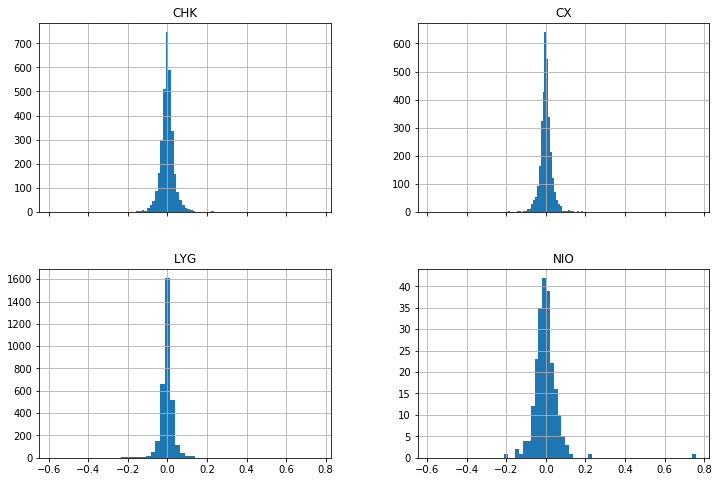

In [11]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date','Ticker','Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins = 50 , sharex = True , figsize = (12,8))
plt.show()

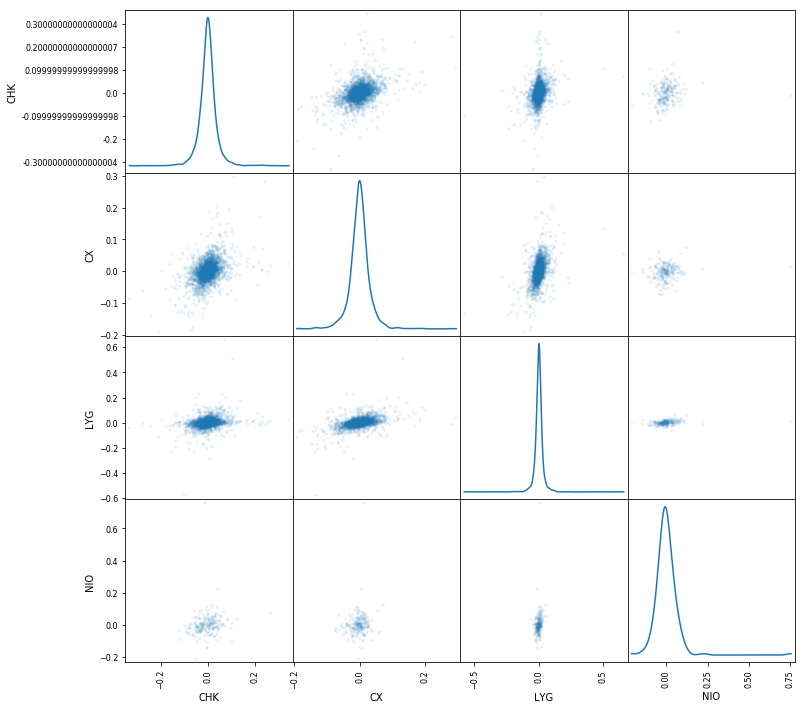

In [12]:
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
plt.show()

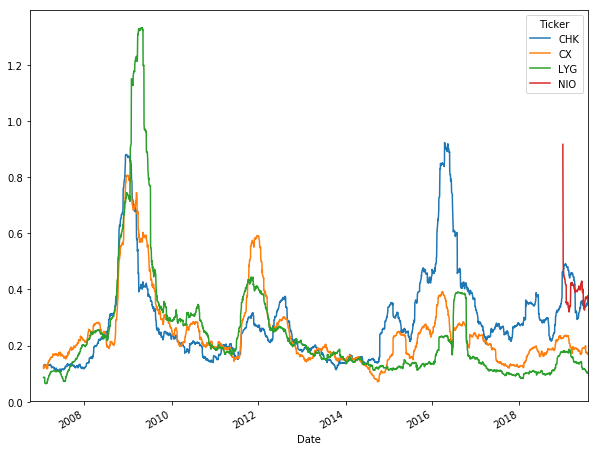

In [14]:
min_periods = 75

vol = daily_pct_change.rolling(min_periods).std()*np.sqrt(min_periods)

vol.plot(figsize=(10,8))

plt.show()

In [16]:
import statsmodels.api as sm
!pip install pandas==0.19.*
from pandas import datetools

  Using cached https://files.pythonhosted.org/packages/08/9d/31ec596099f14528fc6ad39428248ac5360f0bb5205a3ee79a5d1cf260fb/pandas-0.19.2.tar.gz
  Running setup.py bdist_wheel for pandas: started
  Running setup.py bdist_wheel for pandas: finished with status 'error'
  Complete output from command C:\Users\admin\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-_917ojka\\pandas\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\admin\AppData\Local\Temp\pip-wheel-c6c_et91 --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\pandas
  copying pandas\info.py -> build\lib.win-amd64-3.7\pandas
  copying pandas\_version.py -> build\lib.win-amd64-3.7\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-3

    copying pandas\io\tests\parser\data\test1.csv.gz -> build\lib.win-amd64-3.7\pandas\io\tests\parser\data
    copying pandas\io\tests\parser\data\salaries.csv.bz2 -> build\lib.win-amd64-3.7\pandas\io\tests\parser\data
    copying pandas\io\tests\parser\data\test1.csv.bz2 -> build\lib.win-amd64-3.7\pandas\io\tests\parser\data
    copying pandas\io\tests\parser\data\utf16_ex.txt -> build\lib.win-amd64-3.7\pandas\io\tests\parser\data
    creating build\lib.win-amd64-3.7\pandas\io\tests\sas\data
    copying pandas\io\tests\sas\data\airline.csv -> build\lib.win-amd64-3.7\pandas\io\tests\sas\data
    copying pandas\io\tests\sas\data\DEMO_G.csv -> build\lib.win-amd64-3.7\pandas\io\tests\sas\data
    copying pandas\io\tests\sas\data\DRXFCD_G.csv -> build\lib.win-amd64-3.7\pandas\io\tests\sas\data
    copying pandas\io\tests\sas\data\paxraw_d_short.csv -> build\lib.win-amd64-3.7\pandas\io\tests\sas\data
    copying pandas\io\tests\sas\data\productsales.csv -> build\lib.win-amd64-3.7\pandas\io

  Failed building wheel for pandas
Command "C:\Users\admin\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-_917ojka\\pandas\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\admin\AppData\Local\Temp\pip-record-_8y37jil\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\admin\AppData\Local\Temp\pip-install-_917ojka\pandas\


ImportError: cannot import name 'datetools' from 'pandas' (C:\Users\admin\Anaconda3\lib\site-packages\pandas\__init__.py)

In [17]:
all_adj_close = all_data[['Adj Close']]

In [18]:
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

In [19]:
# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'LYG']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

In [20]:
# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'CHK']
msft_returns.index = msft_returns.index.droplevel('Ticker')

In [21]:
# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['LYG', 'CHK']

In [23]:
# Add a constant 
X = sm.add_constant(return_data['LYG'])

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
# Construct the model
model = sm.OLS(return_data['CHK'],X).fit()

In [25]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CHK   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     254.6
Date:                Tue, 06 Aug 2019   Prob (F-statistic):           3.24e-55
Time:                        17:16:31   Log-Likelihood:                 6085.5
No. Observations:                3229   AIC:                        -1.217e+04
Df Residuals:                    3227   BIC:                        -1.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.001     -1.036      0.3

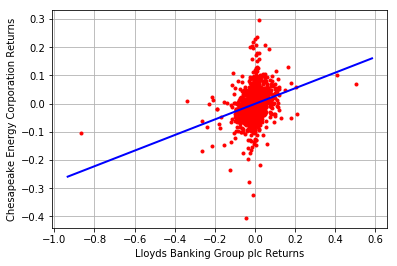

In [27]:
plt.plot(return_data['LYG'] , return_data['CHK'], 'r.')

ax = plt.axis()

x = np.linspace(ax[0] , ax[1]+0.01)

plt.plot(x , model.params[0] + model.params[1] * x , 'b' , lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Lloyds Banking Group plc Returns')
plt.ylabel('Chesapeake Energy Corporation Returns')

plt.show()

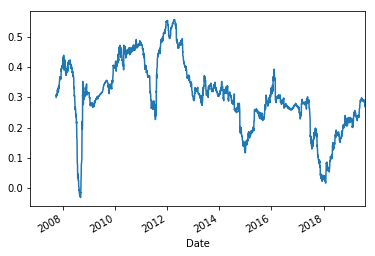

In [28]:
# Plot the rolling correlation
return_data['CHK'].rolling(window=252).corr(return_data['LYG']).plot()

# Show the plot
plt.show()

In [29]:
short_window = 40
long_window = 100

signals = pd.DataFrame(index = aapl.index)
signals['signal'] = 0.0

signals['short_mavg'] = aapl['Close'].rolling(window = short_window,min_periods=1 , center=False).mean()

signals['long_mavg'] = aapl['Close'].rolling(window = long_window,min_periods=1 , center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()

print(signals)

NameError: name 'aapl' is not defined